# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
names = df[['country']].copy()
X = df.drop(['country'],axis =1 )

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [6]:
kmeans = KMeans(n_clusters = 5
               ).fit(X_scaled)

# 2.) Pick two features to visualize across

In [7]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

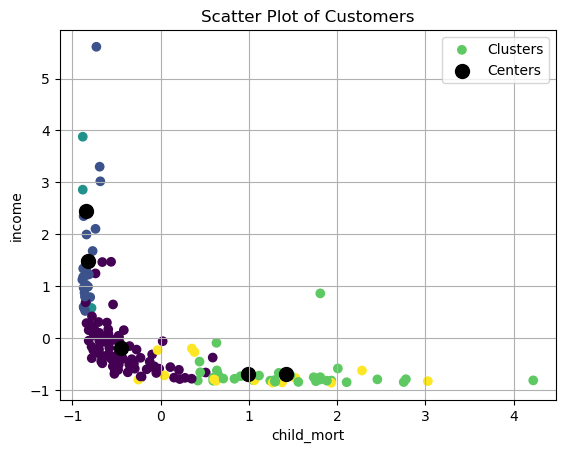

In [8]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [9]:
WCSSs =[]
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30,init='random')
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [10]:
#WCSSs = [KMeans(n_clusters = k, n_init = 30,init='random'.fit(X_scaled).inertia_)]

In [11]:
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3917199643636,
 631.6974570212071,
 551.3018692517414,
 517.3276797608672,
 479.7070491048137,
 422.6107639328459,
 405.3296430513128,
 381.23751758773085,
 358.6984024787712,
 333.4505981485886,
 321.80514212870867]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

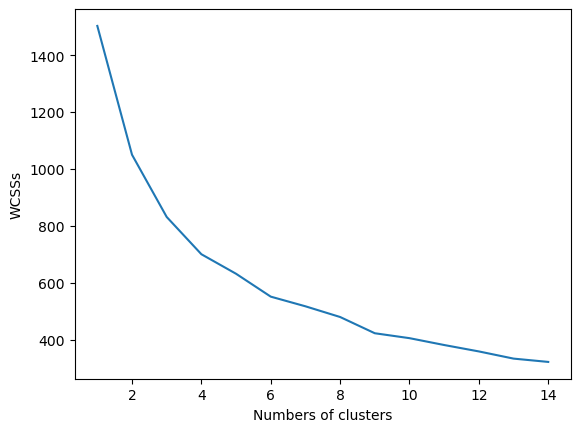

In [12]:
plt.plot(ks,WCSSs)
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSSs')
plt.show()

# 6.) Do the same for a silhoutte plot

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
SCs =[]
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30,init='random')
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled,kmeans.labels_))


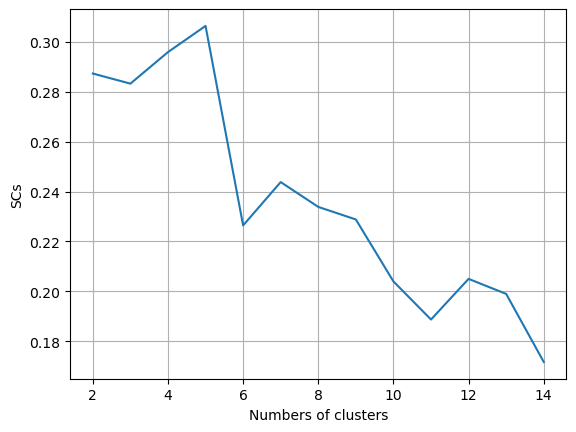

In [15]:
plt.plot(ks,SCs)
plt.xlabel('Numbers of clusters')
plt.ylabel('SCs')
plt.grid()
plt.show()


# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [16]:
kmeans = KMeans(n_clusters =2, n_init = 30, init ='random').fit(X_scaled)

In [17]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [18]:
output = pd.concat([preds,df],axis=1)

In [25]:
output
output.loc[output[0]==0]


,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
12,0,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758
17,0,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
19,0,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980
...,...,...,...,...,...,...,...,...,...,...,...
155,0,Uganda,81.0,17.1,9.01,28.6,1540,10.600,56.8,6.15,595
161,0,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.500,68.8,2.34,1380
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310


In [27]:
output.loc[output[0]==1]

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,1,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,1,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
...,...,...,...,...,...,...,...,...,...,...,...
158,1,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
159,1,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,1,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500


#### Write an observation
We can see that for 'developed countries' that the clustering model suggests, their gdpp are much higher than developing countries, but not all countries in this category has higher gdpp than 'developing countries'. For example, Vietnam is grouped in 'developed country' with real developed country like United States and United Kingdom, but it is actually not developed country with lower dgpp with 'developing' category.  

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [22]:
output.groupby(0). mean()

/var/folders/7b/jmxrs8s50bx8fxdg6nst2hn80000gn/T/ipykernel_60090/1443799597.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0). mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [23]:
output.groupby(0). std()

/var/folders/7b/jmxrs8s50bx8fxdg6nst2hn80000gn/T/ipykernel_60090/4105359034.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0). std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

We assume label 1 as developed country and lebel 0 as developing country. The mean and std of developed and developing country looks reasonble since we expect that there is lower rate of child mortabilty rate in developed country and higher rate of health as well. Also, there must be higher gdpp in developed countries.